/Users/jordenroderique/Desktop/HIT140-Assignment-3/analysis/jorden


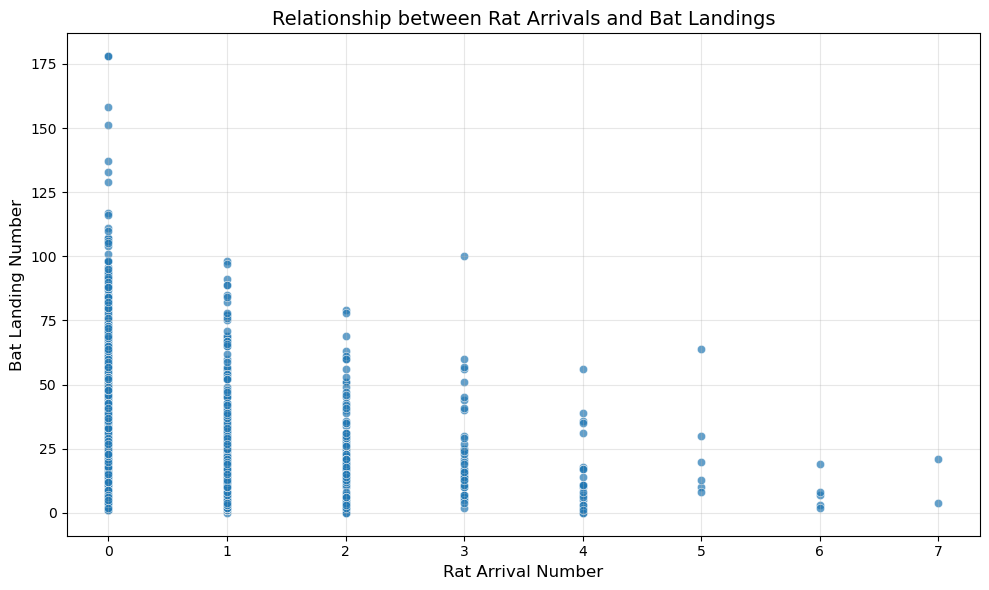

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

cwd = os.getcwd()
print(cwd)
ds2_path = '../../datasets/cleaned/cleaned_dataset2_seasons.csv'
df = pd.read_csv(os.path.join(cwd, ds2_path))
df = df[df['season'] == 1] # Get spring rows

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rat_arrival_number', y='bat_landing_number', data=df, alpha=0.7)
plt.title('Relationship between Rat Arrivals and Bat Landings', fontsize=14)
plt.xlabel('Rat Arrival Number', fontsize=12)
plt.ylabel('Bat Landing Number', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('../../figures/jr-analysis-spring/figure1.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [10]:
food_limit = df['food_availability'].quantile(0.1)

mean_bats_low_food = df[df['food_availability'] < food_limit]['bat_landing_number'].mean()
mean_bats_high_food = df[df['food_availability'] > food_limit]['bat_landing_number'].mean()

median = df['food_availability'].median()

mean_bats_below_med = df[df['food_availability'] < median]['bat_landing_number'].mean()
mean_bats_above_med = df[df['food_availability'] > median]['bat_landing_number'].mean()



print("=== FOOD AVAILABILITY ANALYSIS (10th Percentile Split) ===")
print(f"10th percentile threshold: {food_limit:.2f}")
print(f"Mean bat landings (low food availability): {mean_bats_low_food:.2f}")
print(f"Mean bat landings (high food availability): {mean_bats_high_food:.2f}")
print(f"Difference: {mean_bats_high_food - mean_bats_low_food:.2f}")
print()


print("=== FOOD AVAILABILITY ANALYSIS (Median Split) ===")
print(f"Median threshold: {median:.2f}")
print(f"Mean bat landings (below median): {mean_bats_below_med:.2f}")
print(f"Mean bat landings (above median): {mean_bats_above_med:.2f}")
print(f"Difference: {mean_bats_above_med - mean_bats_below_med:.2f}")

=== FOOD AVAILABILITY ANALYSIS (10th Percentile Split) ===
10th percentile threshold: 1.00
Mean bat landings (low food availability): 10.98
Mean bat landings (high food availability): 31.28
Difference: 20.29

=== FOOD AVAILABILITY ANALYSIS (Median Split) ===
Median threshold: 3.00
Mean bat landings (below median): 28.63
Mean bat landings (above median): 21.26
Difference: -7.37


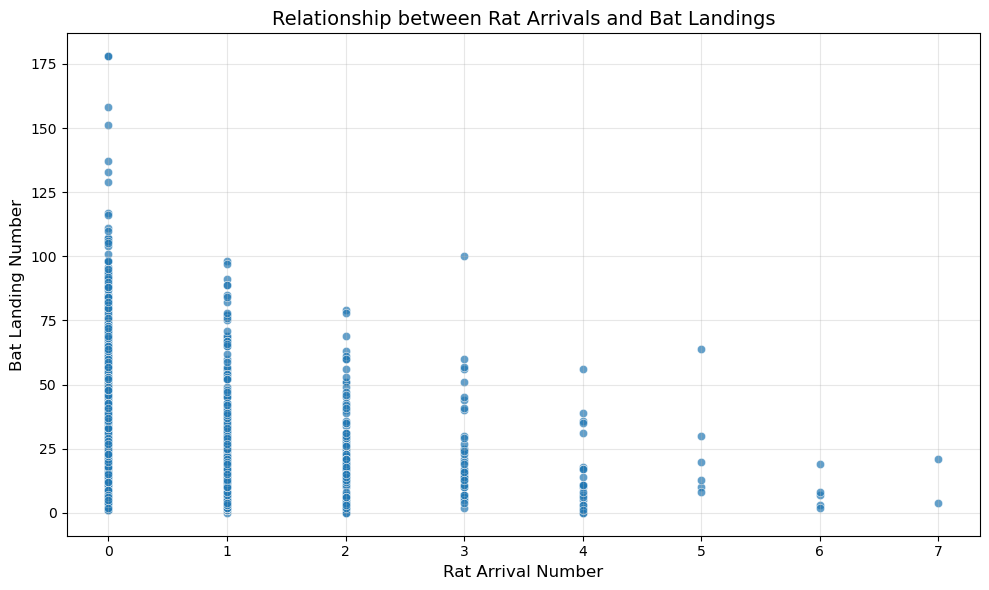

In [11]:
# Remove rows where food availability is in the lower 10%.
# This is to account for any variation that a bat may not land
# due to there being little to no food on the platform.
lower_percentile = df['food_availability'].quantile(0.1)
df_cleaned = df[df['food_availability'] >= lower_percentile]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rat_arrival_number', y='bat_landing_number', data=df, alpha=0.7)
plt.title('Relationship between Rat Arrivals and Bat Landings', fontsize=14)
plt.xlabel('Rat Arrival Number', fontsize=12)
plt.ylabel('Bat Landing Number', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('../../figures/jr-analysis-spring/figure2.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

Original: 1231 rows
Cleaned: 1218 rows
Removed: 13 outliers


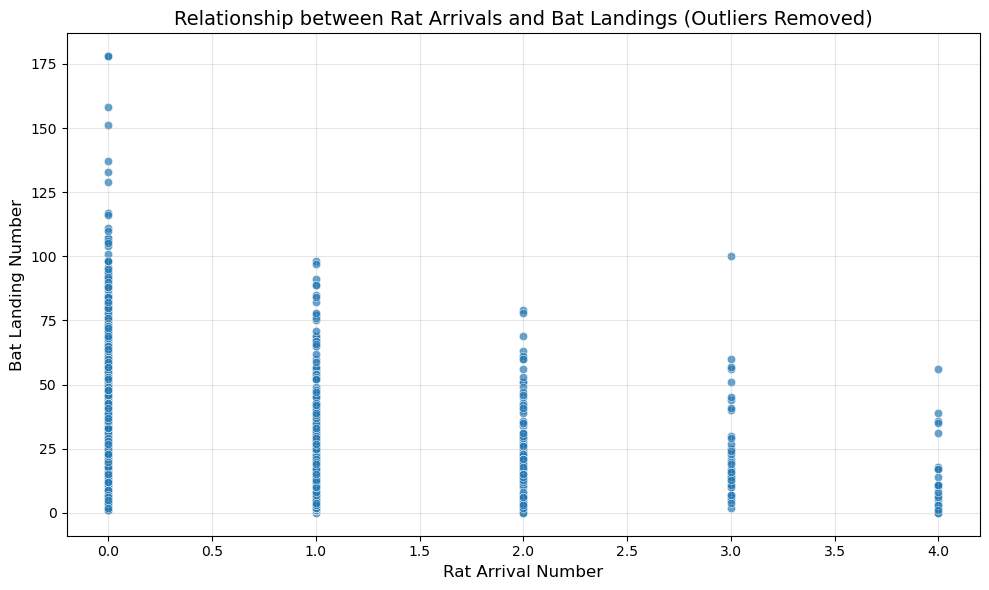

In [12]:
df_cleaned = df[df['rat_arrival_number'] <= 4]

print(f"Original: {len(df)} rows")
print(f"Cleaned: {len(df_cleaned)} rows")
print(f"Removed: {len(df) - len(df_cleaned)} outliers")

# Plot cleaned data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rat_arrival_number', y='bat_landing_number', data=df_cleaned, alpha=0.7)
plt.title('Relationship between Rat Arrivals and Bat Landings (Outliers Removed)', fontsize=14)
plt.xlabel('Rat Arrival Number', fontsize=12)
plt.ylabel('Bat Landing Number', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('../../figures/jr-analysis-spring/figure3.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


/var/folders/qs/xh0_hy1s0td2x_nf5q34kwxr0000gn/T/ipykernel_85509/3457115715.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final = df_cleaned.groupby('rat_arrival_number').apply(remove_outliers_by_group).reset_index(drop=True)


After removing bat_landing outliers by group: 1175 rows
Total removed: 43 outliers

Outliers removed by rat_arrival_number group:
Rat arrival 0: 23 outliers removed (815 -> 792)
Rat arrival 1: 9 outliers removed (237 -> 228)
Rat arrival 2: 7 outliers removed (99 -> 92)
Rat arrival 3: 2 outliers removed (43 -> 41)
Rat arrival 4: 2 outliers removed (24 -> 22)


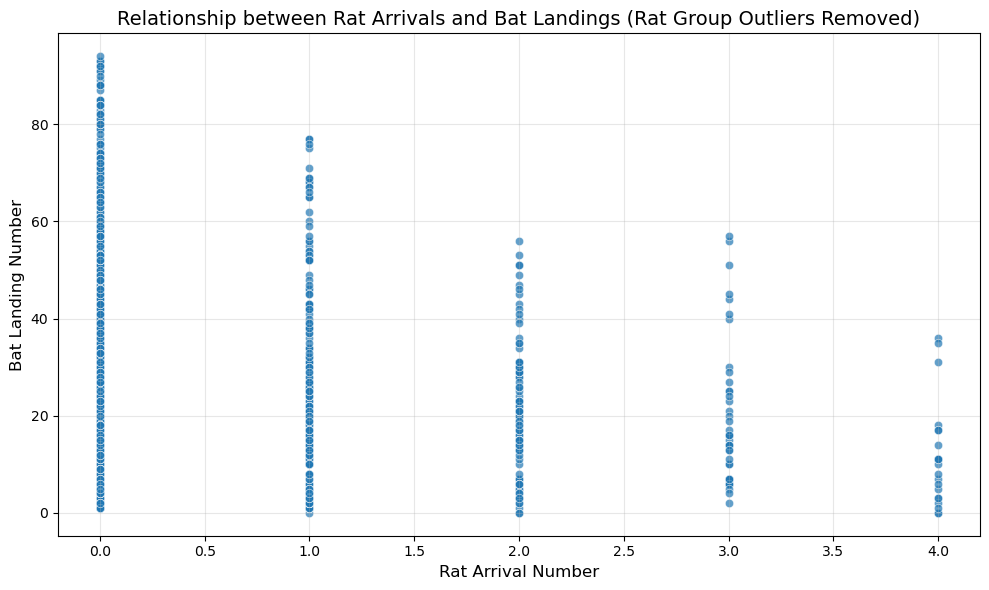

In [13]:
# Function to remove outliers within each group using IQR
def remove_outliers_by_group(group):
    Q1 = group['bat_landing_number'].quantile(0.25)
    Q3 = group['bat_landing_number'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers within this group
    return group[(group['bat_landing_number'] >= lower_bound) &
                 (group['bat_landing_number'] <= upper_bound)]

df_final = df_cleaned.groupby('rat_arrival_number').apply(remove_outliers_by_group).reset_index(drop=True)

print(f"After removing bat_landing outliers by group: {len(df_final)} rows")
print(f"Total removed: {len(df_cleaned) - len(df_final)} outliers")

# Show how many were removed from each group
print("\nOutliers removed by rat_arrival_number group:")
for rat_num in range(5):
    original_count = len(df_cleaned[df_cleaned['rat_arrival_number'] == rat_num])
    final_count = len(df_final[df_final['rat_arrival_number'] == rat_num])
    removed = original_count - final_count
    print(f"Rat arrival {rat_num}: {removed} outliers removed ({original_count} -> {final_count})")

# Plot the final cleaned data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rat_arrival_number', y='bat_landing_number', data=df_final, alpha=0.7)
plt.title('Relationship between Rat Arrivals and Bat Landings (Rat Group Outliers Removed)', fontsize=14)
plt.xlabel('Rat Arrival Number', fontsize=12)
plt.ylabel('Bat Landing Number', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('../../figures/jr-analysis-spring/figure4.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

Mean bat landings by rat arrival number:
   rat_arrival_number  bat_landing_number
0                   0           27.948232
1                   1           24.609649
2                   2           21.630435
3                   3           19.975610
4                   4           11.681818


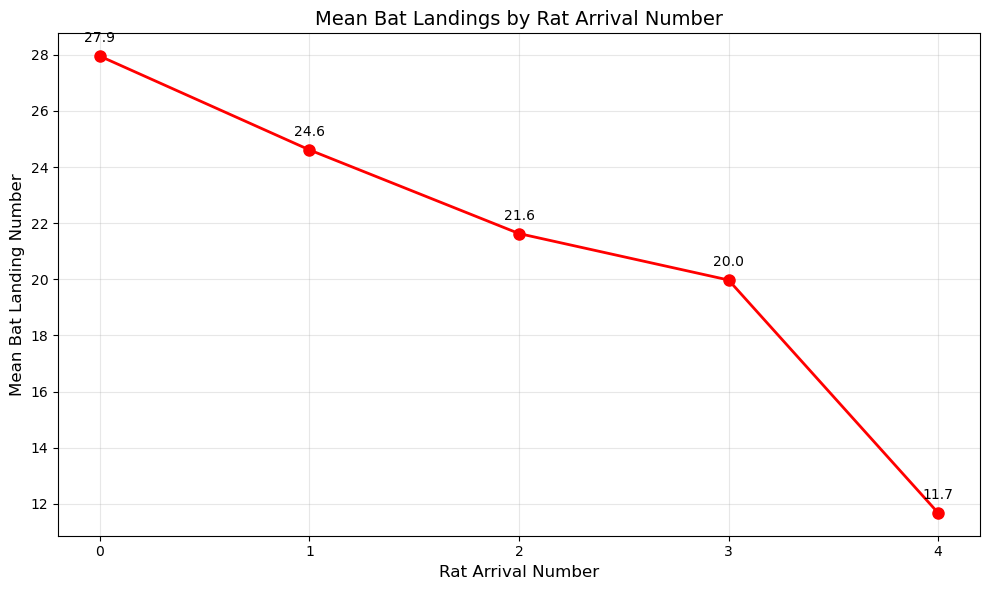

In [14]:
# Calculate mean bat_landing_number for each rat_arrival_number group
mean_by_group = df_final.groupby('rat_arrival_number')['bat_landing_number'].mean().reset_index()

print("Mean bat landings by rat arrival number:")
print(mean_by_group)

# Create line plot
plt.figure(figsize=(10, 6))

plt.plot(mean_by_group['rat_arrival_number'], mean_by_group['bat_landing_number'],
         marker='o', linewidth=2, markersize=8, color='red')
plt.title('Mean Bat Landings by Rat Arrival Number', fontsize=14)
plt.xlabel('Rat Arrival Number', fontsize=12)
plt.ylabel('Mean Bat Landing Number', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(5))

for i, row in mean_by_group.iterrows():
    plt.annotate(f'{row["bat_landing_number"]:.1f}',
                (row['rat_arrival_number'], row['bat_landing_number']),
                textcoords="offset points", xytext=(0,10), ha='center')

plt.savefig('../../figures/jr-analysis-spring/figure5.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [15]:
# Inferential Negative Binomial
y = df_final['bat_landing_number']
x = sm.add_constant(df_final['rat_arrival_number'])

model = sm.NegativeBinomial(y, x)
results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 4.257157
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
                     NegativeBinomial Regression Results                      
Dep. Variable:     bat_landing_number   No. Observations:                 1175
Model:               NegativeBinomial   Df Residuals:                     1173
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Oct 2025   Pseudo R-squ.:                0.002388
Time:                        20:04:11   Log-Likelihood:                -5002.2
converged:                       True   LL-Null:                       -5014.1
Covariance Type:            nonrobust   LLR p-value:                 9.896e-07
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.

In [16]:
# 95% CI on Negative Binomial data
coefficient = -0.1470
ci_lower = -0.204
ci_upper = -0.090

irr = np.exp(coefficient)

ci_lower_irr = np.exp(ci_lower)
ci_upper_irr = np.exp(ci_upper)

reduction_percent = (1 - irr) * 100
reduction_lower = (1 - ci_upper_irr) * 100
reduction_upper = (1 - ci_lower_irr) * 100

print("IRR (Incident Rate Ratio)")
print(f"Coefficient: {coefficient}")
print(f"IRR = exp({coefficient}) = {irr:.4f}")
print(f"This means approximately {reduction_percent:.1f}% fewer landings per extra rat")
print()

print("95% Confidence Interval for IRR:")
print(f"CI bounds: [{ci_lower}, {ci_upper}]")
print(f"IRR CI = [exp({ci_lower}), exp({ci_upper})] = [{ci_lower_irr:.4f}, {ci_upper_irr:.4f}]")
print()

print("Interpretation:")
print(f"The decrease in landings per extra rat ranges from {reduction_lower:.1f}% to {reduction_upper:.1f}%")
print(f"(95% confidence interval)")

IRR (Incident Rate Ratio)
Coefficient: -0.147
IRR = exp(-0.147) = 0.8633
This means approximately 13.7% fewer landings per extra rat

95% Confidence Interval for IRR:
CI bounds: [-0.204, -0.09]
IRR CI = [exp(-0.204), exp(-0.09)] = [0.8155, 0.9139]

Interpretation:
The decrease in landings per extra rat ranges from 8.6% to 18.5%
(95% confidence interval)
